In [18]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target
mnist.keys()
print(x)
print(y)

print(mnist.data.shape)
print(mnist.target.shape)

x_train,x_test,y_train,y_test = train_test_split(mnist.data, mnist.target, train_size = 0.9)
print(x_train.shape)

print(x_test.shape)

print(y_train.shape)

print(y_test.shape)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [19]:
model = LogisticRegression(solver = 'lbfgs')

model.fit(x_train,y_train)
predictions = model.predict(x_test)
score = model.score(x_test,y_test)
print(score)

0.9185714285714286


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

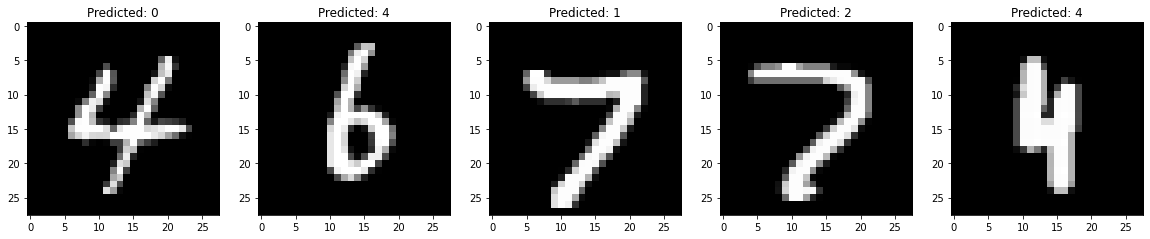

In [45]:
index = 0
nx_test = x_test.to_numpy()
misclassifiedIndexes = []
for label, predict in zip(x_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(nx_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}'.format(predictions[badIndex], fontsize = 15))